<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Find the Best Neighborhood for Opening a Pet Service Store in Manhattan </font></h1>

## Introduction

Manhattan, New York has 40 neighborhoods full of diversity. There are lots of opportunities of doing businesses but it is also very challenging to start your own business.

My client Tina plans to open her pet service store in Manhattan. The pet service store will provide grooming services on-site and at customer’s home. It may also expand the business to pets walking and boarding. I will use Manhattan location data to help her pick the right neighborhood for the new store, which has many potential customers nearby, fewer competitors and a reasonable rental price.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Gather Venue Information in Manhattan Neighborhoods Related to Pet Stores</a>

4. <a href="#item4">Analyze Relationship between Pet Stores and Related Features </a>
    
5. <a href="#item5">Machine Learning to Predict Potential Pet Stores</a>    

6. <a href="#item6">Cluster Neighborhoods to Validate Results</a> 
    
7. <a href="#item6">Conclusion</a>
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


<a id='item1'></a>

## 1. Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web: https://geo.nyu.edu/catalog/nyu_2451_34572

Since the file is already placed on the server, we can simply run a `wget` command and access the data.

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

Next, let's load the data.

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [13]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
print('The Manhattan dataframe has {} neighborhoods.'.format(manhattan_data.shape[0]))
manhattan_data.head()

The Manhattan dataframe has 40 neighborhoods.


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [14]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [15]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

## 2. Explore Neighborhoods in Manhattan

#### Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = 'KTVI3HPWCUSYVYMRKGTORQVHUUQLPN3REZ13OGHWASDBAEFF' # your Foursquare ID
CLIENT_SECRET = 'IQ1RYUIOMU1VM5HMLGARBN1NJN24ZRDVPAF3P3AWSBYCBO1V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KTVI3HPWCUSYVYMRKGTORQVHUUQLPN3REZ13OGHWASDBAEFF
CLIENT_SECRET:IQ1RYUIOMU1VM5HMLGARBN1NJN24ZRDVPAF3P3AWSBYCBO1V


<a id='item2'></a>

#### Let's create a function to get nearby top 100 venues within a radius of 500 meters to all the neighborhoods in Manhattan

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT=100
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [24]:

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe

In [25]:
print(manhattan_venues.shape)
print('Manhattan has {} different venue categories'.format(len(manhattan_venues['Venue Category'].unique())))

(2969, 7)
Manhattan has 322 different venue categories


#### Let's what are those venue categoies

In [26]:
manhattan_venues['Venue Category'].unique()

array(['Pizza Place', 'Yoga Studio', 'Diner', 'Coffee Shop', 'Donut Shop',
       'Pharmacy', 'Tennis Stadium', 'Seafood Restaurant', 'Gym',
       'Supplement Shop', 'Steakhouse', 'Department Store',
       'American Restaurant', 'Sandwich Place', 'Ice Cream Shop',
       'Discount Store', 'Video Game Store', 'Bank', 'Kids Store',
       'Miscellaneous Shop', 'Deli / Bodega', 'Greek Restaurant', 'Hotel',
       'Spa', 'Bakery', 'Cocktail Bar', 'Museum', 'English Restaurant',
       'Tea Room', 'Hotpot Restaurant', 'New American Restaurant',
       'Indie Movie Theater', 'Roof Deck', 'Spanish Restaurant',
       'Chinese Restaurant', 'Noodle House', 'Salon / Barbershop',
       'Furniture / Home Store', 'Bike Shop', 'Historic Site',
       'Asian Restaurant', 'Boutique', 'Garden Center', 'Karaoke Bar',
       'Thai Restaurant', 'Music Venue', 'Cosmetics Shop',
       'Organic Grocery', 'Bubble Tea Shop', 'Malay Restaurant',
       'Supermarket', 'Snack Place', 'Vietnamese Restaurant',


#### Let's find out how many unique categories can be curated from all the returned venues

In [27]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 322 uniques categories.


<a id='item3'></a>

## 3. Gather Venue Information in Manhattan Neighborhoods Related to Pet Stores

#### Now, let's encode each venue into digit

In [28]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]
manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spir

#### Next, let's pick the venues only related to pet stores

In [29]:
# Now let's pick the venues only related to pet service
venue_selected_list=['Neighborhood','Pet Service','Pet Store','Pet Café','Park','Yoga Studio','Gym / Fitness Center','Spa','Supermarket','Grocery Store','Shopping Mall','Farmers Market',"Women's Store",'Coffee Shop','Bubble Tea Shop','Tea Room','Bakery','Dessert Shop','Ice Cream Shop','Frozen Yogurt Shop','Sandwich Place','Noodle House','Ramen Restaurant','Dumpling Restaurant']
manhattan_onehot_pet=manhattan_onehot[venue_selected_list]
manhattan_onehot_pet.head()

,Neighborhood,Pet Service,Pet Store,Pet Café,Park,Yoga Studio,Gym / Fitness Center,Spa,Supermarket,Grocery Store,Shopping Mall,Farmers Market,Women's Store,Coffee Shop,Bubble Tea Shop,Tea Room,Bakery,Dessert Shop,Ice Cream Shop,Frozen Yogurt Shop,Sandwich Place,Noodle House,Ramen Restaurant,Dumpling Restaurant
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Check the data frame size
manhattan_onehot_pet.shape

(2969, 24)

#### Next, let's group venues by neighborhood and get the count of each venues in each neighborhood

In [31]:
manhattan_grouped = manhattan_onehot_pet.groupby('Neighborhood').sum().reset_index()
manhattan_grouped

,Neighborhood,Pet Service,Pet Store,Pet Café,Park,Yoga Studio,Gym / Fitness Center,Spa,Supermarket,Grocery Store,Shopping Mall,Farmers Market,Women's Store,Coffee Shop,Bubble Tea Shop,Tea Room,Bakery,Dessert Shop,Ice Cream Shop,Frozen Yogurt Shop,Sandwich Place,Noodle House,Ramen Restaurant,Dumpling Restaurant
0,Battery Park City,0,1,0,6,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0
1,Carnegie Hill,0,1,0,0,3,3,1,1,2,0,0,0,8,0,0,3,0,0,0,0,0,1,0
2,Central Harlem,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Chelsea,0,0,0,2,0,0,0,0,1,0,0,1,7,0,0,2,0,3,0,1,0,1,0
4,Chinatown,0,0,0,0,1,0,3,2,1,0,0,0,3,2,1,4,1,2,0,2,2,0,1
5,Civic Center,0,0,0,3,3,3,4,0,0,0,1,0,5,0,0,1,0,0,0,0,0,0,0
6,Clinton,0,0,0,1,0,5,3,1,0,0,0,0,5,0,0,1,1,1,0,3,0,0,0
7,East Harlem,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,4,0,0,0,1,0,0,0
8,East Village,1,0,1,1,0,1,0,0,1,0,1,0,4,0,1,1,2,1,0,0,0,2,0
9,Financial District,0,0,0,2,1,4,2,0,0,0,0,0,6,2,0,0,0,1,0,2,0,0,0


#### Now, let's combine the venues in the same categories and create a new data frame

In [32]:
# Combine the venues of pet service store competitors
list1=['Pet Service','Pet Store','Pet Café']
manhattan_grouped['Competitor']=manhattan_grouped[list1].sum(axis=1)
# Combine the venues of fitness and spa                         
list2=['Yoga Studio','Gym / Fitness Center','Spa']
manhattan_grouped['Fitness']=manhattan_grouped[list2].sum(axis=1)
# Combine the venues of shopping
list3=['Supermarket','Grocery Store','Shopping Mall','Farmers Market',"Women's Store"]
manhattan_grouped['Shopping']=manhattan_grouped[list3].sum(axis=1)
# Combine the venues of food and drink                     
list4=['Coffee Shop','Bubble Tea Shop','Tea Room','Bakery','Dessert Shop','Ice Cream Shop','Frozen Yogurt Shop','Sandwich Place','Noodle House','Ramen Restaurant','Dumpling Restaurant']
manhattan_grouped['Cafe']=manhattan_grouped[list4].sum(axis=1)
manhattan_grouped.head()

,Neighborhood,Pet Service,Pet Store,Pet Café,Park,Yoga Studio,Gym / Fitness Center,Spa,Supermarket,Grocery Store,Shopping Mall,Farmers Market,Women's Store,Coffee Shop,Bubble Tea Shop,Tea Room,Bakery,Dessert Shop,Ice Cream Shop,Frozen Yogurt Shop,Sandwich Place,Noodle House,Ramen Restaurant,Dumpling Restaurant,Competitor,Fitness,Shopping,Cafe
0,Battery Park City,0,1,0,6,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,2,2
1,Carnegie Hill,0,1,0,0,3,3,1,1,2,0,0,0,8,0,0,3,0,0,0,0,0,1,0,1,7,3,12
2,Central Harlem,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,1
3,Chelsea,0,0,0,2,0,0,0,0,1,0,0,1,7,0,0,2,0,3,0,1,0,1,0,0,0,2,14
4,Chinatown,0,0,0,0,1,0,3,2,1,0,0,0,3,2,1,4,1,2,0,2,2,0,1,0,4,3,18


In [33]:
# create a new data frame
manhattan_pet=pd.DataFrame(manhattan_grouped[['Neighborhood','Competitor','Park','Fitness','Shopping','Cafe']])
manhattan_pet.head()

,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe
0,Battery Park City,1,6,0,2,2
1,Carnegie Hill,1,0,7,3,12
2,Central Harlem,0,1,3,0,1
3,Chelsea,0,2,0,2,14
4,Chinatown,0,0,4,3,18


#### Now, let's load Manhattan retail rental price and apartment rental price by neighborhood and add those into the new data frame

In [34]:
# Load Manhattan retail rental price
retail_rent=pd.read_csv('Manhattan_Retail_Rental_Price.csv')
retail_rent.head()

,Neighborhood,Spring 2019,Fall 2018,Spring 2018,Average Price in USD
0,Battery Park City,401,338,368,369
1,Carnegie Hill,1039,1160,1390,1196
2,Central Harlem,137,140,124,134
3,Chelsea,277,303,313,298
4,Chinatown,544,558,595,566


In [35]:
# Load Manhattan apartment rental price
apart_rent=pd.read_csv('Manhattan_Apartment_Rental_Price.csv')
apart_rent.head()

,Neighborhood,Average Rent
0,Battery Park City,5605
1,Carnegie Hill,4458
2,Central Harlem,2965
3,Chelsea,4370
4,Chinatown,5116


In [36]:
# Add retail and apartment rental price to the new data frame
manhattan_pet['Retail Rental']=retail_rent['Average Price in USD']
manhattan_pet['Apartment Rental']=apart_rent['Average Rent']

#### Now, let's add latitude and longitude information back to the new data frame

In [37]:
# Add neighborhood latitude and longitude to the new data frame
manhattan_data.sort_values(by='Neighborhood', ascending=True, inplace=True)
manhattan_pet[['Latitude','Longitude']]=manhattan_data[['Latitude','Longitude']]

In [38]:
manhattan_pet.head()

,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
0,Battery Park City,1,6,0,2,2,369,5605,40.876551,-73.910660
1,Carnegie Hill,1,0,7,3,12,1196,4458,40.715618,-73.994279
2,Central Harlem,0,1,3,0,1,134,2965,40.851903,-73.936900
3,Chelsea,0,2,0,2,14,298,4370,40.867684,-73.921210
4,Chinatown,0,0,4,3,18,566,5116,40.823604,-73.949688


## 4. Analyze Relationship between Pet Stores and Related Features

Now we have the neighborhood data ready for our analysis fpr choosing location for new pet service store.

#### Sort the data by number of existing pet stores

In [39]:
# sort the data by "Competitor"
manhattan_pet.sort_values(by='Competitor', ascending=False, inplace=True)
manhattan_pet.reset_index(inplace=True, drop=True)

Let's check how many neighborhoods already have pet stores and have no pet stores.

In [40]:
print('The first {} neighborhoods have pet sores.'.format(manhattan_pet[manhattan_pet['Competitor']>0].shape[0]))
manhattan_pet

The first 18 neighborhoods have pet sores.


,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
0,Washington Heights,2,2,2,7,11,134,2284,40.731000,-73.974052
1,East Village,2,1,1,2,11,298,4320,40.775639,-73.960508
2,Flatiron,2,3,13,3,7,405,4276,40.768113,-73.958860
3,Battery Park City,1,6,0,2,2,369,5605,40.876551,-73.910660
4,Inwood,1,2,1,3,7,134,2375,40.754691,-73.981669
5,Murray Hill,1,0,4,2,9,597,4143,40.808000,-73.963896
6,Noho,1,0,0,4,14,566,4394,40.737210,-73.981376
7,Carnegie Hill,1,0,7,3,12,1196,4458,40.715618,-73.994279
8,Lower East Side,1,1,1,1,6,298,4676,40.727847,-73.982226
9,Little Italy,1,0,4,2,15,369,5607,40.726933,-73.999914


We can use the first 18 rows of data as our traning data set to analyze the relationship between number of existing pet stores and other related features in the data frame.

#### Check the relationship between number of existing pet stores and its related features

 Check the relationship between number of existing pet stores and number of parks

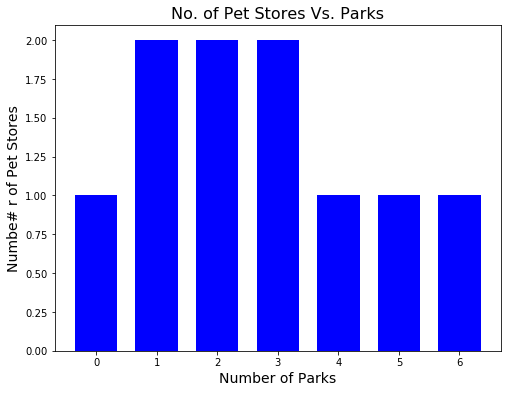

In [50]:
# manhattan_pet.loc[0:17,:].plot(kind='scatter',x='Park',y='Competitor',color='green', fontsize=14, figsize=(8, 6))

plt.figure(figsize=(8, 6))
plt.bar(manhattan_pet.loc[0:17,'Park'], manhattan_pet.loc[0:17,'Competitor'],color='blue',width=0.7)
plt.title('No. of Pet Stores Vs. Parks',fontsize=16)
plt.ylabel('Numbe# r of Pet Stores',fontsize=14)
plt.xlabel('Number of Parks',fontsize=14)

plt.show()

We can see that there is no obvious linear relationship between number of parks and nubmer of pet stores.

Let's check the relationship between number of existing pet stores and number of fitness centers

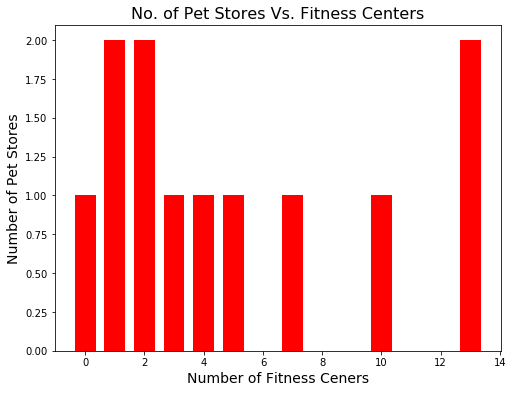

In [52]:
# manhattan_pet.plot(kind='scatter', x='Fitness',y='Competitor',color='red', fontsize=14, figsize=(8, 6))

plt.figure(figsize=(8, 6))
plt.bar(manhattan_pet.loc[0:17,'Fitness'], manhattan_pet.loc[0:17,'Competitor'],color='red',width=0.7)
plt.title('No. of Pet Stores Vs. Fitness Centers',fontsize=16)
plt.ylabel('Number of Pet Stores',fontsize=14)
plt.xlabel('Number of Fitness Ceners',fontsize=14)

plt.show()

Still, there is no obvious linear relationship betweeen number of fitness centers and nubmer of pet stores.

Let's check the relationship between number of existing pet stores and retail rental price.

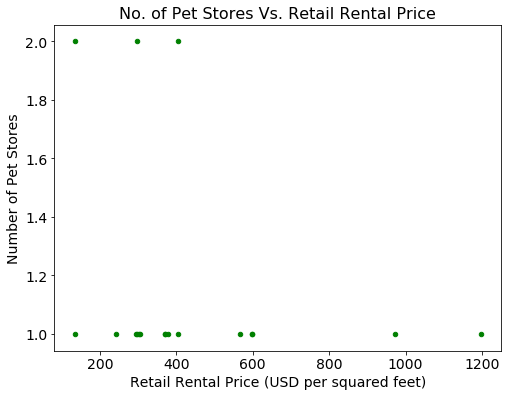

In [53]:
manhattan_pet.loc[0:17,:].plot(kind='scatter', x='Retail Rental',y='Competitor',color='green', fontsize=14, figsize=(8, 6))
plt.title('No. of Pet Stores Vs. Retail Rental Price',fontsize=16)
plt.ylabel('Number of Pet Stores',fontsize=14)
plt.xlabel('Retail Rental Price (USD per squared feet)',fontsize=14)

plt.show()

Again, there is no obvious linear relationship betweeen retail rental price and nubmer of pet stores.

There is no simple model to extract the relationship between existing nubmer of pet stores and other related features in the data frame.

We need machine learning to create the model based on the neighboorhood data which already has pet stores. 
And use the model to predict the potential number of pet stores in those neighborhoods which currently have no pet store.

## 5. Machine Learning to Predict Potential Pet Stores

#### Prepare training data and test data
First, we need to clean the data by dropping some freatures.
Then normalize the data without the "Competitor" column by maximum number of each column.

In [54]:
# Prepare the training and test data by dropping some columns and normalization
df=manhattan_pet.drop(['Neighborhood','Competitor','Latitude','Longitude'], axis=1)
df_norm=df/df.max()

We split the data set into training data which has pet stores and test data which has no pet store.

In [55]:
x_train=df_norm.loc[0:17,:]
y_train=manhattan_pet.loc[0:17,'Competitor']
x_test=df_norm.loc[18:40,:]
x_train.head()

,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental
0,0.333333,0.153846,1.000000,0.611111,0.070120,0.407348
1,0.166667,0.076923,0.285714,0.611111,0.155939,0.770465
2,0.500000,1.000000,0.428571,0.388889,0.211931,0.762618
3,1.000000,0.000000,0.285714,0.111111,0.193093,0.999643
4,0.333333,0.076923,0.428571,0.388889,0.070120,0.423578


#### Multiple Linear Regression
First, let's create a multiple linear regression object and train the model using the training data

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(x_train, y_train)
yhat_train = lr.predict(x_train)

Let's check R squared and mean square error 

In [57]:
# Calculate the R^2
r2=lr.score(x_train, y_train)
print('The R-square is: ', r2)
# Calculate mean square error 
mse = mean_squared_error(y_train, yhat_train)
print('The mean square error of number of pet stores and predicted value is: ', mse)

The R-square is:  0.46209194294065986
The mean square error of number of pet stores and predicted value is:  0.07470945236935278


#### Ridge Regression
Secondly, let's create a ridge regression object and train the model using the training data

In [58]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

pr=PolynomialFeatures(degree=3)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
rm=Ridge(alpha=0.1)
rm.fit(x_train_pr,y_train)
yhat_train=rm.predict(x_train_pr)

Let's check R squared and mean square error 

In [59]:
# Calculate the R^2
r2=rm.score(x_train_pr, y_train)
print('The R-square is: ', r2)
# Calculate mean square error 
mse = mean_squared_error(y_train, yhat_train)
print('The mean square error of number of pet stores and predicted value is: ', mse)

The R-square is:  0.679983760684943
The mean square error of number of pet stores and predicted value is:  0.04444669990486902


Ridge regression is better which returns larger R^2 and smaller mean square error. 

Let's examine the distribution of the predicted values of the training data.

Define function for machine learning plotting

In [60]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Number of pet stores')
    plt.ylabel('Proportion')

    plt.show()
    plt.close()

Let's examine the distribution of the predicted values of the training data.

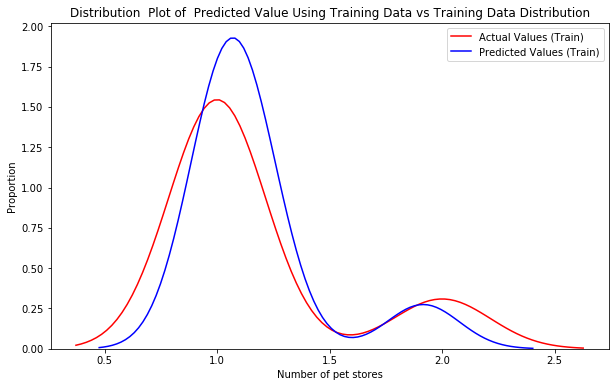

In [61]:
import seaborn as sns
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

So far the model seems to be doing well in learning from the training dataset.

Now, Let's plot the predicted number on training data against the actual number of pet stores to see how the model fits

In [62]:
# Round yhat_train and yhat_test to 1 decimal place
yhat_train=np.round(yhat_train,1)

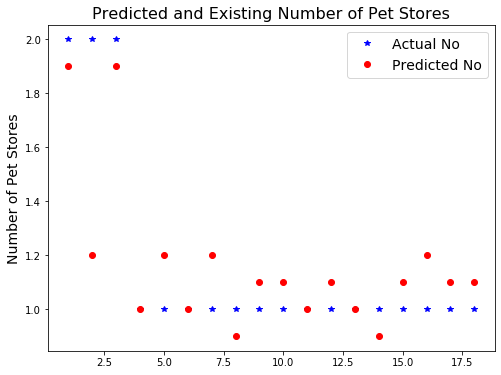

In [63]:
x0=np.arange(1, 19, 1)
plt.figure(figsize=(8,6))
plt.plot(x0,y_train,'b*',x0, yhat_train,'ro')
plt.fontsize=14
plt.title('Predicted and Existing Number of Pet Stores',fontsize=16)
plt.ylabel('Number of Pet Stores',fontsize=14)
plt.legend(['Actual No', 'Predicted No'],fontsize=14)

plt.show()

The model fits reasonablly well on the training data set.

Since we don't have a large data set, we will skip the validation data.

#### Predict Number of Pet Stores using Ridge Regression Model

Now let's predict the number of pet stores using the test data

In [64]:
yhat_test=rm.predict(x_test_pr)
yhat_test=np.round(yhat_test,1)
yhat_test

array([1. , 1. , 0.9, 1.5, 1.2, 1.3, 1.1, 1. , 0.9, 1.1, 1. , 1.1, 1.2,
       1.3, 1.2, 1. , 0.9, 1.4, 1.1, 1.3, 0.9, 1.3])

Now, let add those predicted numbers to manhanttan_pet data frame only from row 18 to 40 which has no pet store

In [65]:
manhattan_pet_predict=manhattan_pet.loc[18:40,:]
manhattan_pet_predict.reset_index(inplace=True,drop=True)
manhattan_pet_predict['Potential Pet Store']=pd.DataFrame(yhat_test)
manhattan_pet_predict.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude,Potential Pet Store
0,Soho,0,0,3,2,9,369,5301,40.707107,-74.010665,1.0
1,Roosevelt Island,0,2,1,2,2,377,3416,40.711932,-74.016869,1.0
2,Midtown South,0,0,6,2,4,597,4276,40.734434,-74.006180,0.9
3,Sutton Place,0,4,8,2,7,241,3941,40.723259,-73.988434,1.5
4,Tribeca,0,5,5,0,4,369,5607,40.715229,-74.005415,1.2


Sort the data by "Potentail Pet Store" to see which neighborhoods have larger number of potential new pet stores

In [66]:
manhattan_pet_predict.sort_values(by='Potential Pet Store',ascending=False,inplace=True)
manhattan_pet_predict.reset_index(inplace=True, drop=True)
print('The first {} neighborhoods have potentical to open more than 1 pet sores.'.format(manhattan_pet_predict[manhattan_pet_predict['Potential Pet Store']>1].shape[0]))

The first 13 neighborhoods have potentical to open more than 1 pet sores.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Visualize top potential neighborhoods for opening new pet stores
Now, let's check what are those top 5 neighborhoods.

In [67]:
manhattan_pet_predict.head(5)

,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude,Potential Pet Store
0,Sutton Place,0,4,8,2,7,241,3941,40.723259,-73.988434,1.5
1,Civic Center,0,3,10,1,6,566,4489,40.816934,-73.957385,1.4
2,Yorkville,0,2,3,1,15,377,4458,40.756658,-74.000111,1.3
3,Chelsea,0,2,0,2,14,298,4370,40.867684,-73.921210,1.3
4,Morningside Heights,0,4,0,3,5,134,4388,40.797307,-73.964286,1.3


Now, let's visualize the top 5 neighborhoods where is suitable to open new pet store

In [68]:
# create map of Manhattan using latitude and longitude values
map_manhattan_pet = folium.Map(location=[latitude, longitude], zoom_start=11)

# add blue markers for all neighborhood to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_pet)  
    
# add red markers of top 5 neighborhoods for potentail pet stores to map
for lat, lng, label in zip(manhattan_pet_predict.loc[0:4,'Latitude'], manhattan_pet_predict.loc[0:4,'Longitude'], manhattan_pet_predict.loc[0:4,'Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_pet)  
    
map_manhattan_pet

<a id='item4'></a>

## 6. Cluster Neighborhoods to Validate Results

Now, let's group all Manhattan neighborhoods into clusters based on their features related to pet stores.

#### Choose a reasonable cluser number

Run *k*-means to cluster the neighborhood into 5~10 clusters.
Calculate the sum of squared distance to find the optimal cluster number.

In [69]:
manhattan_pet_clustering = manhattan_pet.drop(['Competitor','Neighborhood','Latitude','Longitude'], 1)
manhattan_pet_clustering = manhattan_pet_clustering/manhattan_pet_clustering.max()

Sum_of_squared_distances = []
for k in range(2,10):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(manhattan_pet_clustering)
    # Record sum of squared distances of samples to the nearest cluster center
    Sum_of_squared_distances.append(kmeans.inertia_)

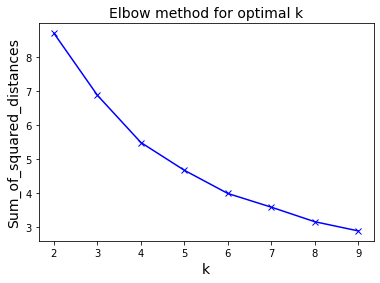

In [70]:
K = range(2,10)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k',fontsize=14)
plt.ylabel('Sum_of_squared_distances',fontsize=14)
plt.title('Elbow method for optimal k',fontsize=14)
plt.show()

Here we can see the drop in the sum of squared distance starts to slow down after k=6. Hence 6 is the optimal number of clusters for our analysis.

#### Run k-means clusering

In [71]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_pet_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 3, 5, 2, 1, 1, 0, 2, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [72]:
# add clustering labels
manhattan_merged = manhattan_pet

manhattan_merged.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged.head() # check the last columns!

,Cluster Labels,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
0,4,Washington Heights,2,2,2,7,11,134,2284,40.731000,-73.974052
1,1,East Village,2,1,1,2,11,298,4320,40.775639,-73.960508
2,3,Flatiron,2,3,13,3,7,405,4276,40.768113,-73.958860
3,5,Battery Park City,1,6,0,2,2,369,5605,40.876551,-73.910660
4,2,Inwood,1,2,1,3,7,134,2375,40.754691,-73.981669


<a id='item5'></a>

#### Examine Clusters

Now, you can examine each cluster and check if top 5 potentail neighborhoods for opening new pet store make sense.

Before that, let's review the range of retail and apartment rental price for all Manhattan neighborhoods.

Tina would like to open the new pet service store where the retail rental price is relatively low because it reduces the cost of business.

Meanwhile she prefer the nearby apartment rental price is relatively high because rental price reflects the income level of potential customers. Customer with higher income tend to spend more money on their pets.

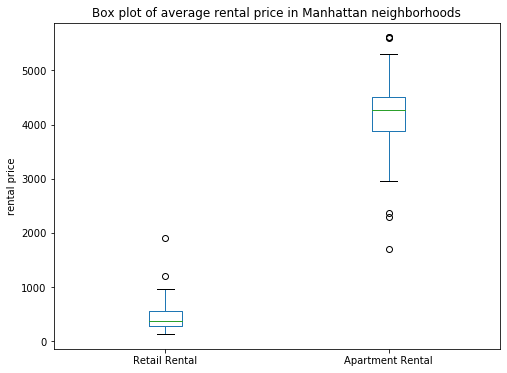

In [73]:
manhattan_pet[['Retail Rental','Apartment Rental']].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of average rental price in Manhattan neighborhoods')
plt.ylabel('rental price')

plt.show()

In [74]:
manhattan_pet[['Retail Rental','Apartment Rental']].describe()

,Retail Rental,Apartment Rental
count,40.000000,40.000000
mean,447.150000,4118.000000
std,347.232542,877.521714
min,134.000000,1708.000000
25%,280.750000,3881.500000
50%,369.000000,4276.000000
75%,566.000000,4516.250000
max,1911.000000,5607.000000


##### We can see that the median retail rental price is 369 USD per square feet and median apartment rental price is 4276 USD.

#### Cluster 1

In [75]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, :]

,Cluster Labels,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
7,0,Carnegie Hill,1,0,7,3,12,1196,4458,40.715618,-73.994279
25,0,Midtown,0,1,5,1,10,971,4022,40.722184,-74.000657
34,0,Clinton,0,1,8,1,11,1911,4053,40.815976,-73.943211


No top 5 potential neighborhood is in this cluster.

#### Cluster 2

In [76]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, :]

,Cluster Labels,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
1,1,East Village,2,1,1,2,11,298,4320,40.775639,-73.960508
5,1,Murray Hill,1,0,4,2,9,597,4143,40.808000,-73.963896
6,1,Noho,1,0,0,4,14,566,4394,40.737210,-73.981376
9,1,Little Italy,1,0,4,2,15,369,5607,40.726933,-73.999914
11,1,Lenox Hill,1,0,3,2,10,241,4231,40.748303,-73.978332
16,1,Upper West Side,1,0,0,1,10,301,4668,40.746917,-73.971219
18,1,Soho,0,0,3,2,9,369,5301,40.707107,-74.010665
30,1,Greenwich Village,0,2,3,1,15,566,4378,40.787658,-73.977059
31,1,Gramercy,0,2,3,3,9,405,4275,40.762160,-73.949168
36,1,Chinatown,0,0,4,3,18,566,5116,40.823604,-73.949688


Neighborhood Chelsea and Yorkville are in the same cluster with East Village which already has 2 pet stores.

Chelsea has 2 parks. Its retail rental price is lower than median price and apartment rental price is a little higher than median price. 

Yorkville has 2 parks. Its retail rental price is around median price and apartment rental price is a little higher than median price

#### Cluster 3

In [77]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, :]

,Cluster Labels,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
4,2,Inwood,1,2,1,3,7,134,2375,40.754691,-73.981669
8,2,Lower East Side,1,1,1,1,6,298,4676,40.727847,-73.982226
10,2,Lincoln Square,1,1,5,2,3,294,4795,40.744035,-74.003116
12,2,Stuyvesant Town,1,2,1,1,1,405,3611,40.782683,-73.953256
19,2,Roosevelt Island,0,2,1,2,2,377,3416,40.711932,-74.016869
20,2,Midtown South,0,0,6,2,4,597,4276,40.734434,-74.006180
24,2,Manhattan Valley,0,1,3,2,4,294,4711,40.717807,-73.980890
26,2,Marble Hill,0,0,1,0,6,134,1708,40.719324,-73.997305
27,2,Manhattanville,0,2,0,1,6,134,2965,40.721522,-74.010683
28,2,Hudson Yards,0,2,4,1,2,948,4416,40.759101,-73.996119


No top 5 potential neighborhood is in this cluster.

#### Cluster 4

In [78]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, :]

,Cluster Labels,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
2,3,Flatiron,2,3,13,3,7,405,4276,40.768113,-73.958860
15,3,Upper East Side,1,1,10,2,8,377,4038,40.752042,-73.967708
21,3,Sutton Place,0,4,8,2,7,241,3941,40.723259,-73.988434
32,3,Financial District,0,2,7,0,11,369,4142,40.775930,-73.947118
35,3,Civic Center,0,3,10,1,6,566,4489,40.816934,-73.957385


Neighborhood Sutton Place and Civic Center are in the same cluster with Flatiron which already has 2 pet stores.

Sutton Place has 4 parks. Its retail rental price and apartment rental price are below the median prices. 

Civic Center has 3 parks. Its retail rental price and apartment rental price are little higher than the medium prices. 

#### Cluster 5

In [79]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, :]

,Cluster Labels,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
0,4,Washington Heights,2,2,2,7,11,134,2284,40.731,-73.974052


Neighborhood Washington Heights is different from other neighborhoods.

#### Cluster 6

In [80]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 5, :]

,Cluster Labels,Neighborhood,Competitor,Park,Fitness,Shopping,Cafe,Retail Rental,Apartment Rental,Latitude,Longitude
3,5,Battery Park City,1,6,0,2,2,369,5605,40.876551,-73.910660
13,5,Tudor City,1,5,4,0,1,597,3808,40.748510,-73.988713
14,5,Turtle Bay,1,4,3,2,9,971,3906,40.760280,-73.963556
17,5,West Village,1,5,0,1,11,306,4598,40.739673,-73.990947
22,5,Tribeca,0,5,5,0,4,369,5607,40.715229,-74.005415
23,5,Morningside Heights,0,4,0,3,5,134,4388,40.797307,-73.964286


Neighborhood Morningside Heights is in the same cluster with four other neighborhoods which already have 1 pet stores. 

Morningside Heights has 4 parks. Its retail rental price is much lower than median price and apartment rental price is a little higher than median price.

#### With 4 parks, low retail rental price and apartment rental price higher than median, Morningside Heights sounds like the best choice for opening a new pet store.

## 7. Conclusion

#### Let's mark our choice of neighborhood on Manhattan map

In [81]:
# create map of Manhattan using latitude and longitude values
map_manhattan_pet = folium.Map(location=[latitude, longitude], zoom_start=11)

# add blue markers for all neighborhood to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_pet)  
    
# add red markers of top 5 neighborhoods for potentail pet stores to map
for lat, lng, label in zip(manhattan_pet_predict.loc[0:4,'Latitude'], manhattan_pet_predict.loc[0:4,'Longitude'], manhattan_pet_predict.loc[0:4,'Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_pet)  
    
# add pop-up text to mark our neighborhood choise
lat = manhattan_merged.loc[23,'Latitude']
lng = manhattan_merged.loc[23,'Longitude']
label = manhattan_merged.loc[23,'Neighborhood']
folium.Marker([lat, lng], popup=label).add_to(map_manhattan_pet)    
    
map_manhattan_pet

### Thank you for reviewing my notebook!